<a href="https://colab.research.google.com/github/sdmadhav/ML-Project/blob/main/COVID_19_cases_EDA_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 1: Project

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.6 MB/s eta 0:00:00


## Read Data

In [4]:
!kaggle datasets download -d ironwolf404/who-covid-19-cases-dataset

!unzip who-covid-19-cases-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/ironwolf404/who-covid-19-cases-dataset
License(s): apache-2.0
  0% 0.00/578k [00:00<?, ?B/s]
100% 578k/578k [00:00<00:00, 56.4MB/s]
Archive:  who-covid-19-cases-dataset.zip
  inflating: WHO COVID-19 cases.csv  


In [5]:
df = pd.read_csv("WHO COVID-19 cases.csv")
df.sample(20)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2829,2022-10-16,AU,Australia,Oceania,WPRO,31327.0,9962868,74.0,15905
4965,2021-08-22,BZ,Belize,North America,AMRO,568.0,15415,7.0,351
36852,2020-03-01,NP,Nepal,Asia,SEARO,NaN,5,NaN,0
19149,2022-04-03,DE,Germany,Europe,EURO,1295125.0,21861236,1536.0,137643
30293,2020-09-20,LR,Liberia,Africa,AFRO,17.0,1363,NaN,88
45830,2023-11-19,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
35701,2021-06-27,MA,Morocco,Africa,EMRO,2861.0,529224,36.0,9273
40634,2022-07-03,PA,Panama,North America,AMRO,10642.0,922990,28.0,8368
44653,2020-01-12,SH,Saint Helena,island,NaN,NaN,0,NaN,0
48530,2024-03-10,SX,Sint Maarten (Dutch part),North America,AMRO,NaN,11051,NaN,92


## Check The data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [7]:
df.isna().sum()

,0
Date_reported,0
Country_code,244
Country,0
Continent,0
WHO_region,4392
New_cases,19300
Cumulative_cases,0
New_deaths,33476
Cumulative_deaths,0


In [8]:
print("Missing Values: ", df.isna().sum().sum())
print("Duplicate Values: ", df.duplicated().sum())

Missing Values:  57412
Duplicate Values:  0


## Data cleaning

In [9]:
df[df["Country_code"].isna()]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36356,2020-01-05,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36357,2020-01-12,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36358,2020-01-19,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36359,2020-01-26,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
36360,2020-02-02,NaN,Namibia,Africa,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
36595,2024-08-04,NaN,Namibia,Africa,AFRO,1.0,172533,NaN,4108
36596,2024-08-11,NaN,Namibia,Africa,AFRO,7.0,172540,NaN,4108
36597,2024-08-18,NaN,Namibia,Africa,AFRO,9.0,172549,NaN,4108
36598,2024-08-25,NaN,Namibia,Africa,AFRO,NaN,172549,NaN,4108


In [10]:
df.loc[(df["Country"]=="Namibia") & (df["Country_code"].isna()), ['Country_code']] = 'NAM'

In [11]:
df[df["Country"]=="Namibia"]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36356,2020-01-05,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36357,2020-01-12,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36358,2020-01-19,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36359,2020-01-26,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
36360,2020-02-02,NAM,Namibia,Africa,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
36595,2024-08-04,NAM,Namibia,Africa,AFRO,1.0,172533,NaN,4108
36596,2024-08-11,NAM,Namibia,Africa,AFRO,7.0,172540,NaN,4108
36597,2024-08-18,NAM,Namibia,Africa,AFRO,9.0,172549,NaN,4108
36598,2024-08-25,NAM,Namibia,Africa,AFRO,NaN,172549,NaN,4108


In [12]:
df["WHO_region"].value_counts()

,count
WHO_region,
EURO,13420
AFRO,11468
AMRO,11468
WPRO,8296
EMRO,5368
SEARO,2684
OTHER,1464


In [13]:
df[df["WHO_region"].isna()]

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
16592,2020-01-05,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16593,2020-01-12,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16594,2020-01-19,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16595,2020-01-26,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
16596,2020-02-02,FK,Falkland Islands (Malvinas),South America,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
45867,2024-08-04,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45868,2024-08-11,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45869,2024-08-18,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2
45870,2024-08-25,PM,Saint Pierre and Miquelon,North America,NaN,NaN,3426,NaN,2


In [14]:
df["Continent"].value_counts()

,count
Continent,
Africa,13908
Europe,11956
Asia,11712
North America,10248
Oceania,4636
South America,3172
Uncategorized,1464
island,1464


In [15]:
df.loc[(df["Continent"]=='Africa') & (df["WHO_region"].isna()), ["WHO_region"]] = 'AFRO'
df.loc[(df["Continent"]=='Europe') & (df["WHO_region"].isna()), ["WHO_region"]] = "EURO"
df.loc[(df["Continent"].isin(["North America", "South America"])) & (df["WHO_region"].isna()), ["WHO_region"]] = "AMRO"
df.loc[(df["Continent"]=='island') & (df["WHO_region"].isna()), ["WHO_region"]] = "WPRO"

In [16]:
df[df["Continent"]=='island'].isna().sum()

,0
Date_reported,0
Country_code,0
Country,0
Continent,0
WHO_region,0
New_cases,1113
Cumulative_cases,0
New_deaths,1418
Cumulative_deaths,0


In [17]:
imputer = SimpleImputer(strategy = "median")

df[ ['New_cases', 'New_deaths'] ] = imputer.fit_transform(df[ ['New_cases', 'New_deaths'] ])


In [18]:
df.sample(20)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
31930,2024-01-14,MW,Malawi,Africa,AFRO,390.0,89168,20.0,2686
42326,2022-03-13,PT,Portugal,Europe,EURO,85842.0,3536925,140.0,21364
21454,2024-05-05,GG,Guernsey,Europe,EURO,390.0,35326,20.0,67
25015,2022-06-12,XXG,International conveyance (Solomon Islands),Uncategorized,OTHER,390.0,5,20.0,0
43661,2024-05-26,RE,Réunion,Africa,AFRO,390.0,494595,20.0,921
10896,2023-01-29,KM,Comoros,Africa,AFRO,1.0,8993,20.0,160
7102,2020-07-05,VG,British Virgin Islands,North America,AMRO,390.0,8,20.0,1
9518,2020-01-19,CF,Central African Republic,Africa,AFRO,390.0,0,20.0,0
48356,2020-11-08,SX,Sint Maarten (Dutch part),North America,AMRO,65.0,870,20.0,22
37858,2020-09-27,NI,Nicaragua,North America,AMRO,86.0,4065,2.0,149


In [19]:
df.isna().sum()

,0
Date_reported,0
Country_code,0
Country,0
Continent,0
WHO_region,0
New_cases,0
Cumulative_cases,0
New_deaths,0
Cumulative_deaths,0


In [20]:
print("Missing Values: ", df.isna().sum().sum())
print("Duplicate Values: ", df.duplicated().sum())

Missing Values:  0
Duplicate Values:  0


## Edit data

In [21]:
l = df["Date_reported"].str.split("-", expand = True)
df["Year"] = l[0]
df["Month"] = l[1]
df["Day"] = l[2]

df.drop(['Date_reported'], axis=1, inplace=True)
new_order = ['Year', 'Month', 'Day','Country', 'Country_code', 'Continent', 'WHO_region',  'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df = df[new_order]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               58560 non-null  object 
 1   Month              58560 non-null  object 
 2   Day                58560 non-null  object 
 3   Country            58560 non-null  object 
 4   Country_code       58560 non-null  object 
 5   Continent          58560 non-null  object 
 6   WHO_region         58560 non-null  object 
 7   New_cases          58560 non-null  float64
 8   Cumulative_cases   58560 non-null  int64  
 9   New_deaths         58560 non-null  float64
 10  Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.9+ MB


## Analyse Data

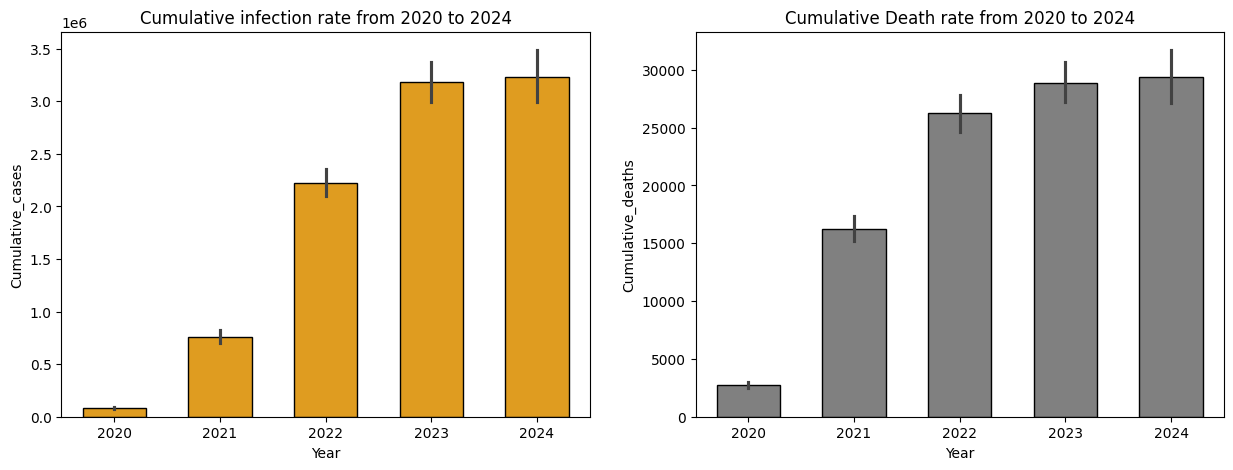

In [23]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(x = "Year", y = "Cumulative_cases", data = df, color='orange', edgecolor='black', width=0.6)
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x = "Year", y = "Cumulative_deaths", data = df, color='gray', edgecolor='black', width=0.6)
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

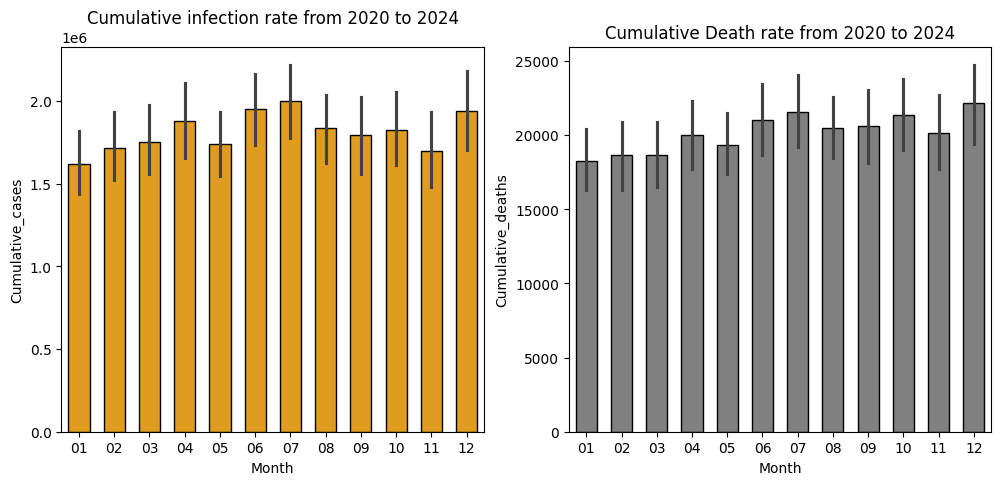

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x="Month", y="Cumulative_cases", data=df, color='orange', edgecolor='black', width=0.6)
plt.title("Cumulative infection rate from 2020 to 2024")

plt.subplot(1,2,2)
sns.barplot(x="Month", y="Cumulative_deaths", data=df, color='gray', edgecolor='black', width=0.6)
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

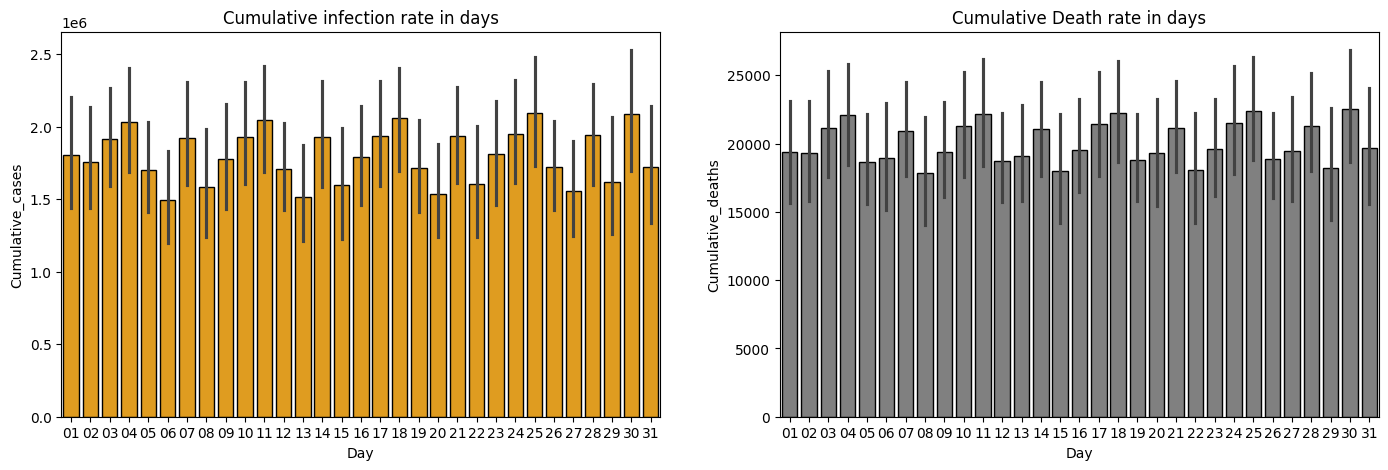

In [50]:
# prompt: generate bar plot with infection rate and death rate in days
df.sort_values(by="Day", inplace=True)

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df["Day"], y=df["Cumulative_cases"], color='orange', edgecolor='black')
plt.title("Cumulative infection rate in days")

plt.subplot(1, 2, 2)
sns.barplot(x="Day", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.title("Cumulative Death rate in days")

plt.show()


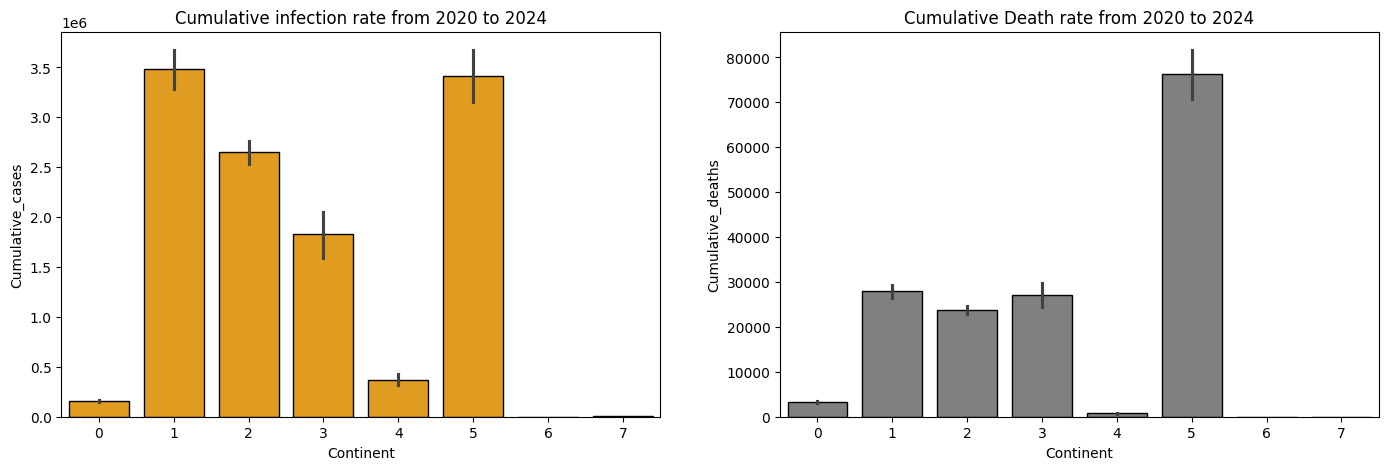

In [51]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x="Continent", y="Cumulative_cases", data=df, color='orange', edgecolor='black')
plt.title("Cumulative infection rate from 2020 to 2024")
plt.xticks(rotation=20)

plt.subplot(1,2,2)
sns.barplot(x="Continent", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.xticks(rotation=20)
plt.title("Cumulative Death rate from 2020 to 2024")

plt.show()

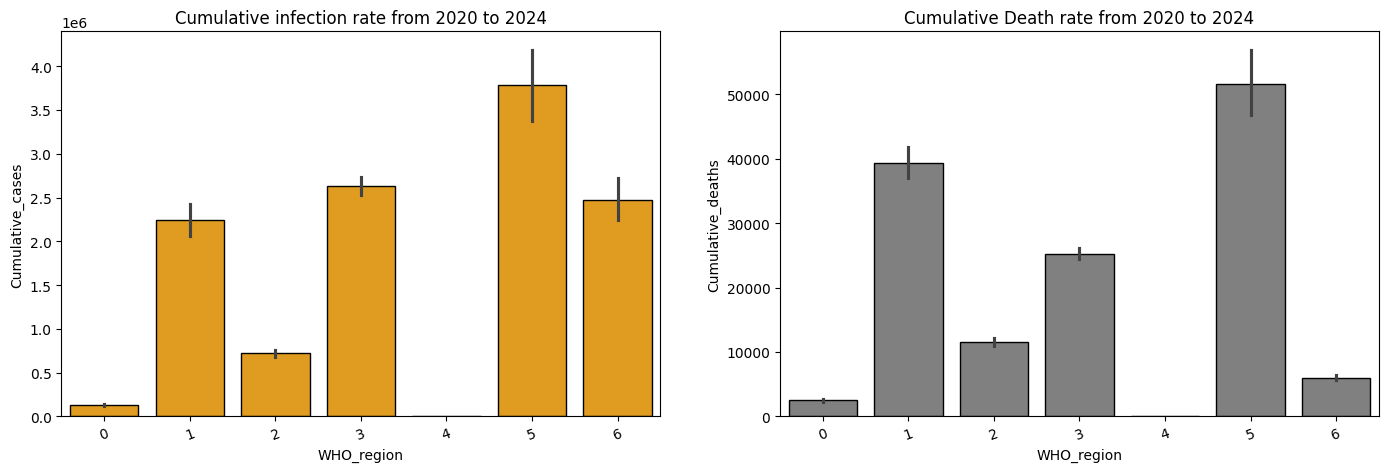

In [47]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(x="WHO_region", y="Cumulative_cases", data=df, color='orange', edgecolor='black')
plt.title("Cumulative infection rate from 2020 to 2024")
plt.xticks(rotation=20)

plt.subplot(1,2,2)
sns.barplot(x="WHO_region", y="Cumulative_deaths", data=df, color='gray', edgecolor='black')
plt.title("Cumulative Death rate from 2020 to 2024")
plt.xticks(rotation=20)
plt.show()

## Preprocessing

In [28]:
df = df.drop("Country_code", axis=1)

In [29]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Continent', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [30]:
df.sort_index(inplace=True)

## Encoding

In [31]:
encoder = LabelEncoder()

df["Country"] = encoder.fit_transform(df["Country"])
df["Continent"] = encoder.fit_transform(df["Continent"])
df["WHO_region"] = encoder.fit_transform(df["WHO_region"])

In [32]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
x

,Year,Month,Day,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths
0,2020,01,05,0,1,2,390.0,0,20.0
1,2020,01,12,0,1,2,390.0,0,20.0
2,2020,01,19,0,1,2,390.0,0,20.0
3,2020,01,26,0,1,2,390.0,0,20.0
4,2020,02,02,0,1,2,390.0,0,20.0
...,...,...,...,...,...,...,...,...,...
58555,2024,08,04,238,0,0,1.0,266387,20.0
58556,2024,08,11,238,0,0,390.0,266387,20.0
58557,2024,08,18,238,0,0,390.0,266387,20.0
58558,2024,08,25,238,0,0,390.0,266387,20.0


In [34]:
y

,Cumulative_deaths
0,0
1,0
2,0
3,0
4,0
...,...
58555,5740
58556,5740
58557,5740
58558,5740


## Scaling

In [35]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [36]:
x

array([[0.        , 0.        , 0.13333333, ..., 0.0016149 , 0.        ,
        0.06752871],
       [0.        , 0.        , 0.36666667, ..., 0.0016149 , 0.        ,
        0.06752871],
       [0.        , 0.        , 0.6       , ..., 0.0016149 , 0.        ,
        0.06752871],
       ...,
       [1.        , 0.63636364, 0.56666667, ..., 0.0016149 , 0.00257536,
        0.06752871],
       [1.        , 0.63636364, 0.8       , ..., 0.0016149 , 0.00257536,
        0.06752871],
       [1.        , 0.72727273, 0.        , ..., 0.0016149 , 0.00257536,
        0.06752871]])

In [37]:
y

,Cumulative_deaths
0,0
1,0
2,0
3,0
4,0
...,...
58555,5740
58556,5740
58557,5740
58558,5740


## Train & Test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
model_1 = LinearRegression()
model_2 = SGDRegressor()
model_3 = Lasso()
model_4 = Ridge()
model_5 = ElasticNet()
model_6 = SVR()
model_7 = KNeighborsRegressor()
model_8 = DecisionTreeRegressor()
model_9 = RandomForestRegressor()
model_10 = BaggingRegressor()
model_11 = ExtraTreesRegressor()
model_12 = AdaBoostRegressor()
model_13 = XGBRegressor()
model_14 = LGBMRegressor()
model_15 = CatBoostRegressor()

In [40]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)
model_11.fit(x_train, y_train)
model_12.fit(x_train, y_train)
model_13.fit(x_train, y_train)
model_14.fit(x_train, y_train)
model_15.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 46848, number of used features: 9
[LightGBM] [Info] Start training from score 20024.489156
Learning rate set to 0.075188
0:	learn: 76475.6497256	total: 56.8ms	remaining: 56.7s
1:	learn: 71433.0027454	total: 63.9ms	remaining: 31.9s
2:	learn: 66697.5059984	total: 71.6ms	remaining: 23.8s
3:	learn: 62327.1617410	total: 78.5ms	remaining: 19.6s
4:	learn: 58319.2232117	total: 86.1ms	remaining: 17.1s
5:	learn: 54600.2288267	total: 93.3ms	remaining: 15.5s
6:	learn: 51247.9319641	total: 103ms	remaining: 14.5s
7:	learn: 48071.6758334	total: 112ms	remaining: 13.9s
8:	learn: 45155.7997734	total: 119ms	remaining: 13.1s
9:	learn: 42424.4455619	total: 126ms	remaining: 12.5s
10:	learn: 3998

## ML scores

In [41]:
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10, model_11, model_12, model_13, model_14, model_15]
model_names = [
    "LinearRegression",
    "SGDRegressor",
    "Lasso",
    "Ridge",
    "ElasticNet",
    "SVR",
    "KNeighborsRegressor",
    "DecisionTreeRegressor",
    "RandomForestRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "AdaBoostRegressor",
    "XGBRegressor",
    "LGBMRegressor",
    "CatBoostRegressor",
]

squared_errors = []
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')

train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

rate = []
for train, test in zip(train_score, test_score):
    result = train - test
    rate.append(f'{result * 100:.2f}%')




ratio = []
for train, test in zip(train_score, test_score):
    if train<=0.65 and test<=0.65:
        ratio.append('Bad')

    elif train > test*1.1 or train>=1.00:
      ratio.append('Overfit')

    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
      ratio.append('Middle')

    elif train > 0.80 and test > 0.80 and train < 1.00 and test < 1.00:
      ratio.append('Good')

    elif train >= 0.80 and test < 0.80:
      ratio.append('High train, Low test')

    else:
      ratio.append("unknown")



In [42]:
model_Score = pd.DataFrame({
    "Model": model_names,
    "Train Score": np.round(train_score, 3),
    "Test Score": np.round(test_score, 3),
    "Ratio": rate,
    'Evaluate model': ratio,
    "Squared Error": squared_errors,
})

model_Score

,Model,Train Score,Test Score,Ratio,Evaluate model,Squared Error
0,LinearRegression,0.676,0.652,2.40%,Middle,241987715570.73%
1,SGDRegressor,0.667,0.637,3.04%,unknown,252353381712.59%
2,Lasso,0.676,0.652,2.41%,Middle,242063174944.80%
3,Ridge,0.675,0.650,2.51%,Middle,243200928256.86%
4,ElasticNet,0.020,0.020,0.07%,Bad,681266064415.31%
5,SVR,-0.053,-0.054,0.11%,Bad,732672711115.00%
6,KNeighborsRegressor,0.927,0.879,4.77%,Good,84072554421.77%
7,DecisionTreeRegressor,1.000,0.999,0.11%,Overfit,749227402.70%
8,RandomForestRegressor,1.000,1.000,0.03%,Good,280610378.47%
9,BaggingRegressor,1.000,0.999,0.04%,Good,398236125.03%


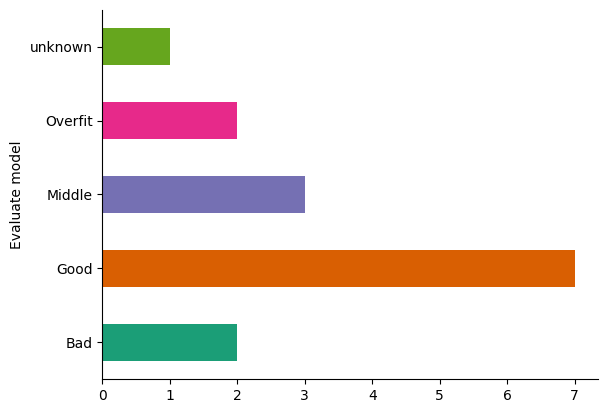

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
model_Score.groupby('Evaluate model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# DAY - 2

## Questions
1. how to know if data is correct for problem?
> * Data relevance:  Check if the features in the dataset are relevant to the problem being solved. For example, to predict house prices, data on house size, location and number of rooms are relevant.
> * Data Quality: Look for missing values, duplicates, or outliers. Data preprocessing ensures that data is correct and usable.
> * Data format: Ensure the data is in correct format (numeric, categorical, etc). For instance, machine learning models work best with numeric data, so categorical data may need to be encoded.

2. How to understand data? What to focus on and why?
> * EDA: This includes visualizing data distributions, calculating summary stats, and identifying patterns.
> * Distributions: Look at how features are distributed (e.g., normal, skewed) to determine if normalization or scaling is needed.
> * Correlations: Examine relationships between features and the target variable to identify relevant predictors.
> * Outliers: Identify any anomalies that could skew results. Understanding these can help improve model accuracy.
> * Domain Knowledge: Leveraging your understanding of the context helps prioritize which features to focus on.


3. How to Choose Among Supervised Algorithms
> * Start Simple: Begin with straightforward models (like linear regression) to establish a baseline.
> * Nature of the Problem: Distinguish between regression (predicting continuous values) and classification (predicting categories).
> * Data Size: Use simpler models for smaller datasets and consider more complex models for larger datasets.
> * Cross-Validation: Implement cross-validation to assess different models and select the one that generalizes well to unseen data.


4. Identifying Best Hyperparameters
> * Grid Search/Random Search: Use these techniques to systematically test different hyperparameter combinations. Grid Search is exhaustive, while Random Search is more efficient.
> * Bayesian Optimization: This technique uses past evaluation results to guide the search for optimal hyperparameters.
> * Cross-Validation: Apply this again during hyperparameter tuning to mitigate overfitting and ensure generalization.

**Summary**
 * Prioritize data understanding and preparation.
 * Model selection should align with problem type and data characteristics.
 * Hyperparameter tuning is crucial for maximizing model performance.

## Assumptions in Supervised Learning Algorithms
1. Linear Regression
 > * Linearity: The relationship between independent and dependent variables is linear.
> * Independence: Observations are independent of each other.
> * Homoscedasticity: Constant variance of errors across all levels of independent variables.
> * Normality: The residuals (errors) of the model should be normally distributed.

2. Logistic Regression
> * Binary Outcome: The dependent variable is binary (0 or 1).
> * Linearity of Logits: The log-odds of the dependent variable are linearly related to the independent variables.
> * Independence: Observations are independent.
> * No Multicollinearity: Independent variables should not be highly correlated with each other.

3. Decision Trees
> * No Strict Assumptions: Decision trees do not make strict assumptions about the distribution of the data.
> * Independence: They assume that the features are independent given the target variable.

4. Random Forest
> * No Strict Assumptions: Similar to decision trees, random forests do not assume any specific distribution of the data.
> * Independence: Individual trees are built independently from different subsets of the data.

5. Support Vector Machines (SVM)
> * Linear Separability: Assumes that the data can be separated by a hyperplane (for linear SVM).
> * Kernel Trick: If using kernels, it assumes that the chosen kernel function can effectively separate the data in a higher-dimensional space.


6. K-Nearest Neighbors (KNN)
> * Distance Metric: Assumes that similar instances are located close to each other in the feature space.
> * No Assumptions About Distribution: KNN does not assume any specific distribution of the data.

7. Naive Bayes
> * Conditional Independence: Assumes that the features are conditionally independent given the class label.
> * Distribution of Features: Assumes a specific distribution for the features (e.g., Gaussian distribution for continuous features).

8. Gradient Boosting Machines (GBM) / XGBoost
> * No Strict Assumptions: These models do not make strict assumptions about data distribution.
> * Weak Learners: Assumes that the ensemble of weak learners will converge to a strong learner.